In [4]:
import pandas as pd
import numpy as np

# 加载数据
df = pd.read_csv("output_data_multi.csv")

# 提取 I 和 Q 分量
I_components = df.loc[:, "Sample_0":"Sample_127"].values  # 前128个样本为I分量
Q_components = df.loc[:, "Sample_128":"Sample_255"].values  # 接下来128个样本为Q分量

# 重构数据为复数形式，其中 I 为实部，Q 为虚部
complex_data = I_components + 1j * Q_components

# 保留调制类型和信噪比信息
mod_type = df["Mod_Type"]
snr = df["SNR"]

# 现在 complex_data 是一个包含复数信号的 NumPy 数组，mod_type 和 snr 是 Series 对象包含对应的调制类型和信噪比信息
complex_data[:1]

array([[-5.90147120e-03-0.00779554j, -2.34581790e-03-0.00781637j,
        -7.45061260e-04-0.00401967j, -5.34572450e-03-0.00511351j,
        -5.78941800e-03-0.00593952j, -3.69683500e-03-0.0065699j ,
        -4.97868750e-03-0.00558479j, -6.56572800e-03-0.00529769j,
        -9.04932200e-03+0.00021024j, -4.83668640e-03-0.00604725j,
        -1.00837140e-02-0.00705299j, -4.53815700e-03-0.00768376j,
        -4.31498840e-03-0.00682943j, -5.13423300e-03-0.00526323j,
        -6.07567300e-03-0.00428441j,  1.18665890e-03-0.00823529j,
        -4.65670100e-03-0.00887949j, -6.95332750e-03-0.00665625j,
        -6.66823420e-03-0.00873265j, -6.43977240e-03-0.00415313j,
        -3.82532270e-03-0.00815829j, -8.38821850e-03-0.00602711j,
        -1.01344110e-02-0.01298266j, -6.90073200e-03-0.00686788j,
        -9.62839300e-03-0.00674923j, -1.55354580e-03-0.00403722j,
        -2.88469440e-03-0.00778409j, -4.51788800e-03-0.00531385j,
         3.41027650e-03+0.00321187j,  7.41052260e-03-0.00500479j,
         3

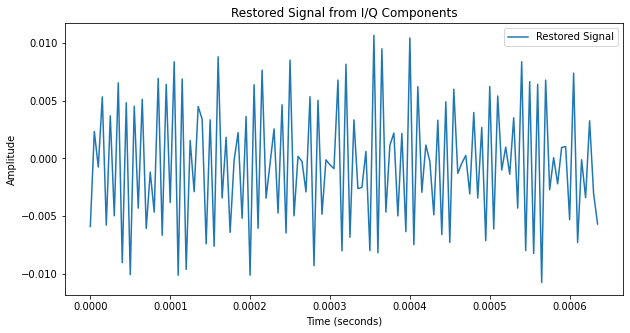

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
fs = 200e3  # 采样率，200kHz
fc = 100e3  # 假设的载波频率，可以根据实际情况调整
t = np.arange(128) / fs  # 生成时间数组，对于每个样本128个点

# 生成载波
cos_wave = np.cos(2 * np.pi * fc * t)  # 余弦载波
sin_wave = np.sin(2 * np.pi * fc * t)  # 正弦载波

df = pd.read_csv("output_data_multi.csv")
# 提取 I 和 Q 分量
I_components = df.loc[:, "Sample_0":"Sample_127"].values  # 前128个样本为I分量
Q_components = df.loc[:, "Sample_128":"Sample_255"].values  # 接下来128个样本为Q分量
# 重构数据为复数形式，其中 I 为实部，Q 为虚部
complex_data = I_components + 1j * Q_components

# 选择一个样本进行还原，这里假设选择第一个样本
sample_signal = complex_data[0]

# 还原信号
restored_signal = np.real(sample_signal) * cos_wave - np.imag(sample_signal) * sin_wave

# 绘制还原的信号
plt.figure(figsize=(10, 5))
plt.plot(t, restored_signal, label='Restored Signal')
plt.title('Restored Signal from I/Q Components')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


### 傅里叶变换

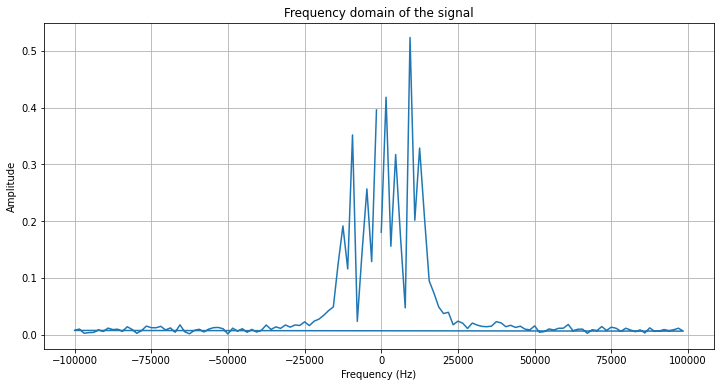

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 加载数据
df = pd.read_csv("output_data_multi.csv")

# 提取 I 和 Q 分量
I_components = df.loc[:, "Sample_0":"Sample_127"].values  # 前128个样本为I分量
Q_components = df.loc[:, "Sample_128":"Sample_255"].values  # 接下来128个样本为Q分量

# 重构数据为复数形式，其中 I 为实部，Q 为虚部
complex_data = I_components + 1j * Q_components

# 保留调制类型和信噪比信息
mod_type = df["Mod_Type"]
snr = df["SNR"]

# 我们取第一个样本来进行FFT
sample_signal = complex_data[1]

# 对该样本进行快速傅里叶变换
fft_result = np.fft.fft(sample_signal)

# 计算频率轴的刻度
n = len(sample_signal)
frequency = np.fft.fftfreq(n, d=1/200000)  # d 是采样间隔，对应的采样率是200kHz

# 绘制FFT结果的幅度谱
plt.figure(figsize=(12, 6))
plt.plot(frequency, np.abs(fft_result))
plt.title('Frequency domain of the signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### Time Domain Signal

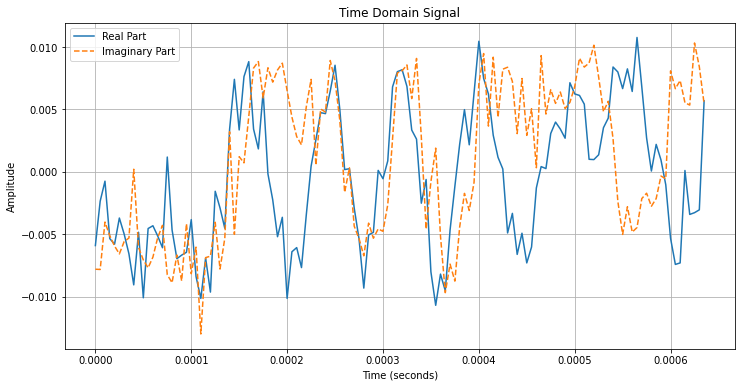

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 complex_data 包含了多个信号样本，我们取第一个样本
sample_signal = complex_data[0]

# 生成时间轴
fs = 200000  # 采样率200kHz
t = np.arange(len(sample_signal)) / fs  # 时间向量

# 绘制时间域图
plt.figure(figsize=(12, 6))
plt.plot(t, np.real(sample_signal), label='Real Part')
plt.plot(t, np.imag(sample_signal), label='Imaginary Part', linestyle='--')
plt.title('Time Domain Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


### Power Spectrum

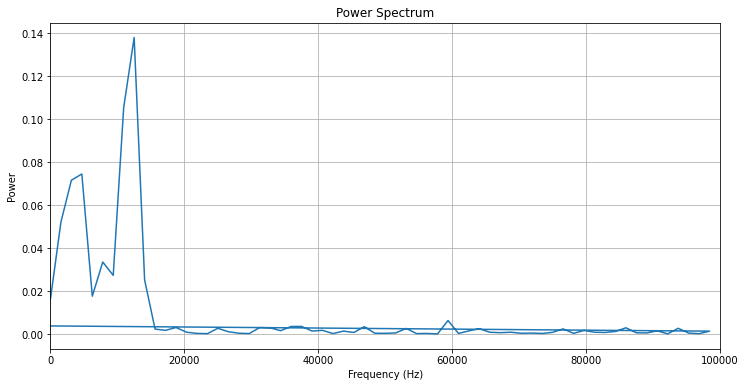

In [9]:
# 对信号进行快速傅里叶变换
fft_result = np.fft.fft(sample_signal)

# 计算功率谱
power_spectrum = np.abs(fft_result)**2

# 生成频率轴
n = len(sample_signal)
frequency = np.fft.fftfreq(n, d=1/fs)

# 绘制功率谱图
plt.figure(figsize=(12, 6))
plt.plot(frequency, power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.xlim([0, fs/2])  # 通常只显示正频率部分直到Nyquist频率
plt.show()
